In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [2]:
df = pd.read_csv('./processed.cleveland.data',
                header=None)


In [3]:
## print the first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice column names would make it easier to know how to format the data, let's replace the column numbers with the following column names:
- age
- se*
- cp, chest pain
- restbp, resting blood pressure (in mm Hg)
- chol, serum cholesterol in mg/dl
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relative to rest,
  slope of the peak exercise ST segment
- ca, number of major vessels (0-3) colored by fluoroscopy
- thal, this is short of thalium heart scan
- hd, diagnosis of heart disease, the predicted attribute
e, the predicted attribute

In [5]:
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Identify Missing Data

In [7]:
# dtypes tell us the data type for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
# print unique values
df['ca'].unique

<bound method Series.unique of 0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302      ?
Name: ca, Length: 303, dtype: object>

In [9]:
df['thal'].unique

<bound method Series.unique of 0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: object>

## Dealing with Missing Data

Since scikit-learn's classification trees do not support datasets with missing values, we need to figure out what to do these question marks. We can either delete these patients from the training dataset, or impute values for the missing data.

In [12]:
len(df.loc[(df['ca'] == '?') | (df['thal'] != '?') ]  )

301

In [13]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [15]:
len(df_no_missing)

297

In [16]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [17]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Format the data split the data into dependent and independent Variables

#### Data set is divided into 2 parts, 1. X for Features 2. y for targets

In [20]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [21]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### One-Hot Encoding

In [23]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [24]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [57]:
pd.get_dummies(X, columns=['cp']).head()


,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [67]:
pd.get_dummies(X, columns=['cp'], dtype=int).head()
  

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [90]:
X_encoded = pd.get_dummies(X, columns=[
    'cp',
    'restecg',
    'slope',
    'thal'
], dtype=int)
X_encided.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [92]:
y.unique()

array([0, 1], dtype=int64)

In [94]:
y_not_zero_index = y > 0 #get index for each-zero value in y

In [96]:
y_not_zero_index.dtypes

dtype('bool')

In [98]:
y[y_not_zero_index] = 1 # set each non-zero value in y to 1
y.unique()

array([0, 1], dtype=int64)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

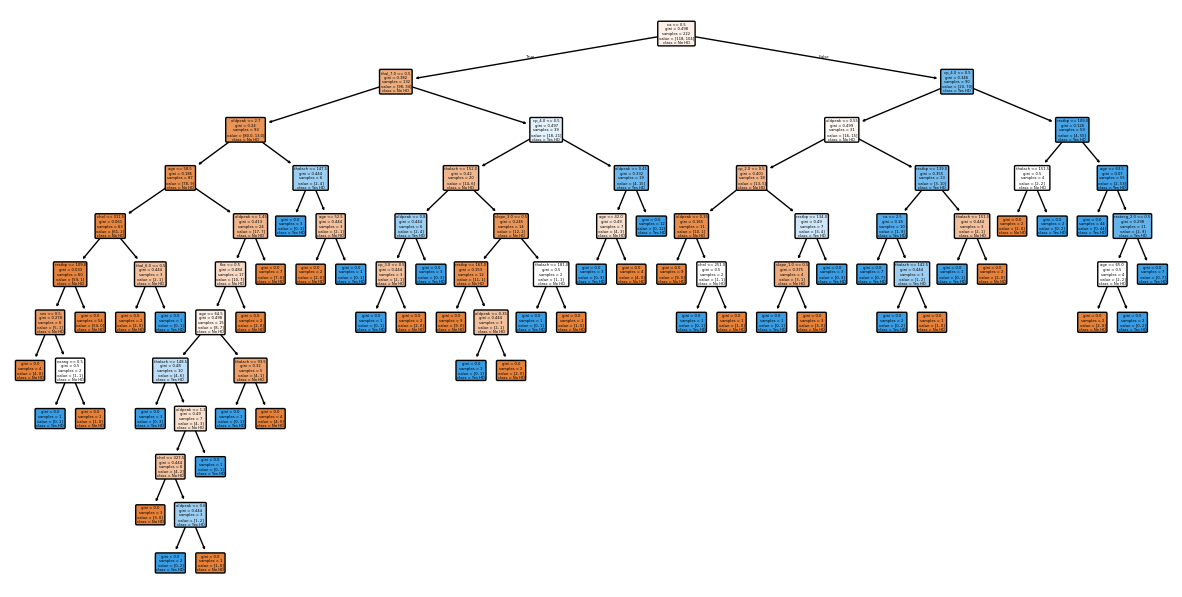

In [108]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=["No HD", "Yes HD"],
         feature_names=X_encoded.columns);

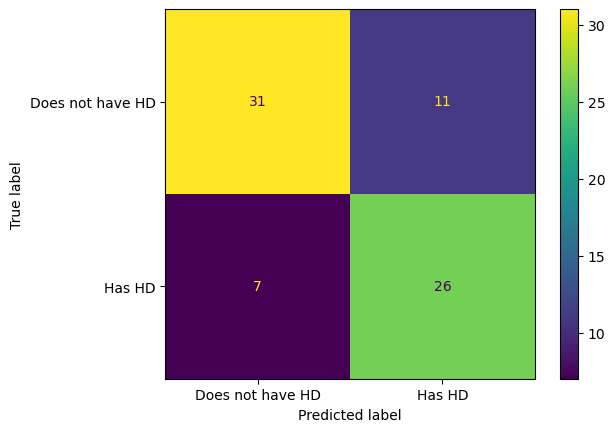

In [116]:
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

In [120]:
## optimize tree, get alphas and impurities
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas, impurities)
print('____________________________________________\n')
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

[0.         0.00295295 0.003861   0.00405405 0.004095   0.00429358
 0.00578761 0.00600601 0.00600601 0.00600601 0.00600601 0.0063593
 0.00667591 0.00675676 0.00757375 0.00811505 0.00868726 0.00889851
 0.01038181 0.0105777  0.01422475 0.01604051 0.01642461 0.02103075
 0.03680006 0.03934523] [0.         0.00885886 0.02430287 0.03241098 0.04060099 0.04918815
 0.06655097 0.08456898 0.096581   0.10859301 0.11459901 0.13367692
 0.14035282 0.14710958 0.15468333 0.17091343 0.17960069 0.18849919
 0.19888101 0.2094587  0.2379082  0.25394872 0.27037333 0.29140408
 0.32820413 0.36754937 0.49801153]
____________________________________________



### Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha.

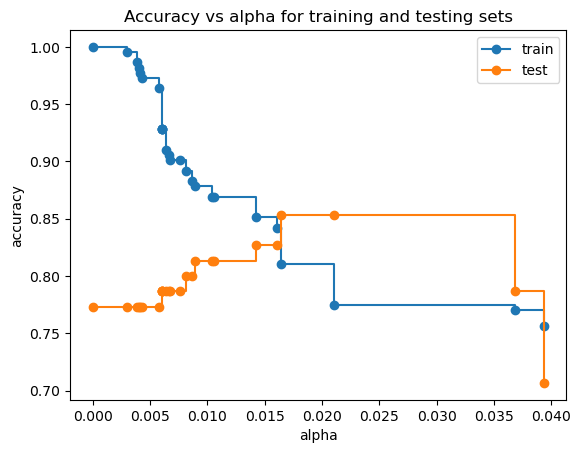

In [125]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

How do we know we used the best Training Dataset and how do we know we used the best Testing Dataset? Typically, we answer this question with 10-Fold Cross Validation. So that's what we're going to do now, and we'll do it with the cross_val_score() function.

The graphs we just drew suggest one value for alpha, 0.016, but another set of data might suggest another optimal value.

<Axes: xlabel='tree'>

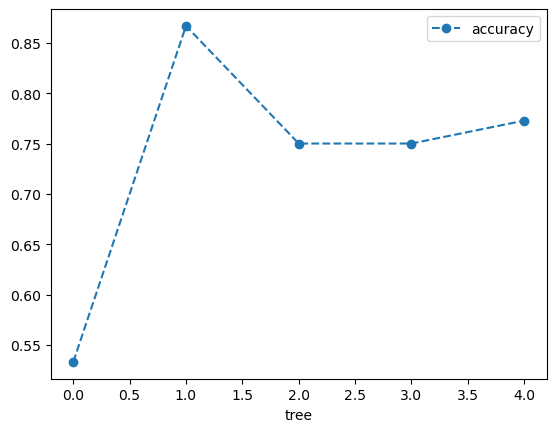

In [131]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

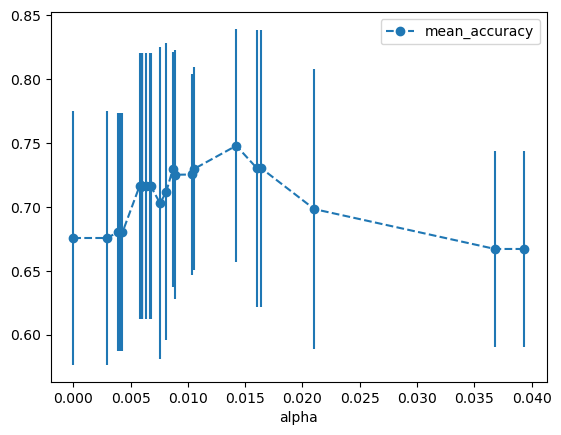

In [135]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [145]:
ideal_ccp_alpha = alpha_results[np.logical_and(alpha_results['alpha']> 0.014, alpha_results['alpha']<0.015)]
ideal_ccp_alpha

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [166]:
print(type(ideal_ccp_alpha))  # make sure the type


<class 'float'>


In [168]:
ideal_ccp_alpha_value = ideal_ccp_alpha

ideal_ccp_alpha

0.014224751066856332

### We will use the best alpha value to build the final Classification Tree

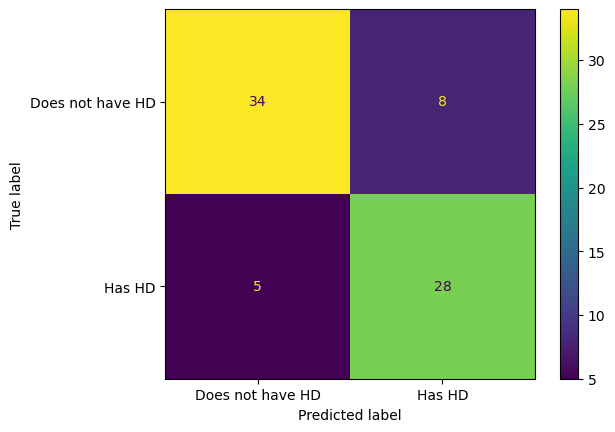

In [184]:
clf_dt_pruned = DecisionTreeClassifier(random_state=40, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

In [186]:
print(len(X.columns))  # 检查 X 的列数
print(clf_dt_pruned.n_features_in_)  # 检查模型中使用的特征数



13
22


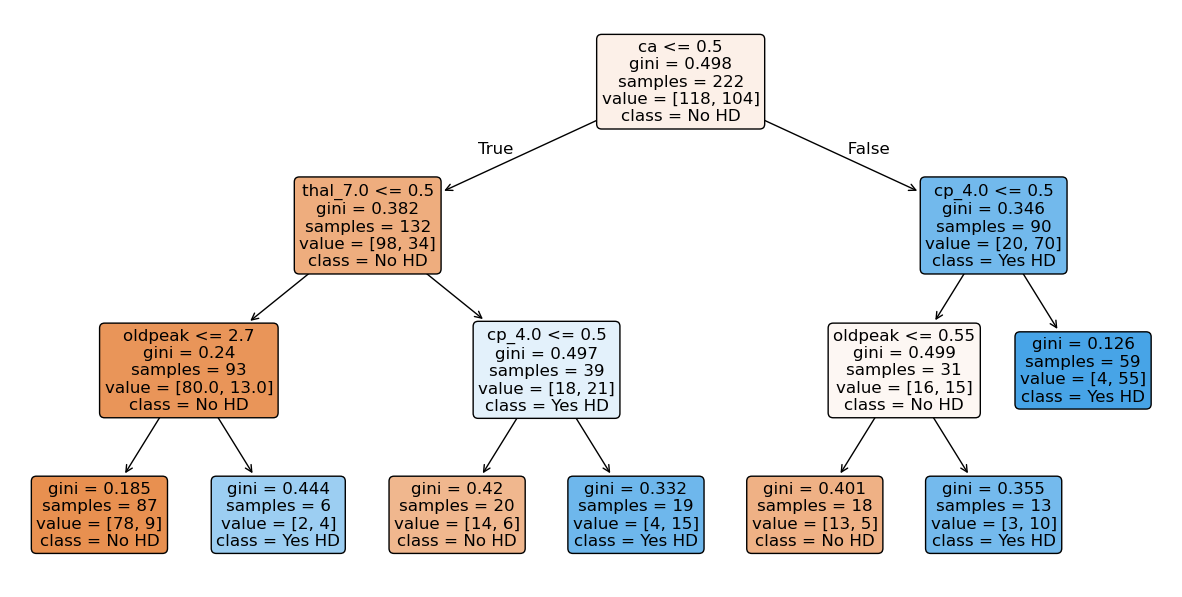

In [192]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encided.columns);